# Соберём все результаты

In [44]:
import numpy as np
import os
import functions
from IPython.display import Image
%pylab
%matplotlib inline
%run ./load_notebook.py

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


/home/lera/.local/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['step']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [16]:
Distance = 9.3 # Mpc
incl = 62.
cosi = np.cos(incl / 180. * np.pi)
sini = np.sin(incl / 180. * np.pi)

In [108]:
sigma_s = np.load('./data/sigma_s.npy')
Sigma_H2 = np.load('./data/Sigma_H2.npy')
sigma_HI = np.load('./data/sigma_HI.npy')
Sigma_HI = np.load('./data/Sigma_HI.npy')
Sigma_s = np.load('./data/Sigma_s.npy')
sig_R_max = np.load('./data/sig_R_max.npy')
sig_R_min = np.load('./data/sig_R_min.npy')
r_HI = np.load('./data/r_HI.npy')
vel_HI = np.load('./data/vel_HI.npy')
velocity_HI = np.load('./data/velocity_HI.npy')
kappa = np.load('./data/kappa.npy')
dist_kpc = np.load('./data/dist_kpc_corr.npy')
sig_R_min_err = np.load('./data/sig_R_min_err.npy')
sig_R_max_err = np.load('./data/sig_R_max_err.npy')
sigma_s_err = np.load('./data/sigma_s_err.npy')
H_alpha = np.load('./data/H_alpha.npy')
Z = np.load('./data/Z.npy')

### Возникла небольшая проблема


В процессе проверки кода я обнаружила, что в качестве PA=178 у меня 180-178 = 12, а не 2. Я исправила эту ошибку, но не до конца. При исправлении у меня что-то странное произошло с эпициклической частотой. 

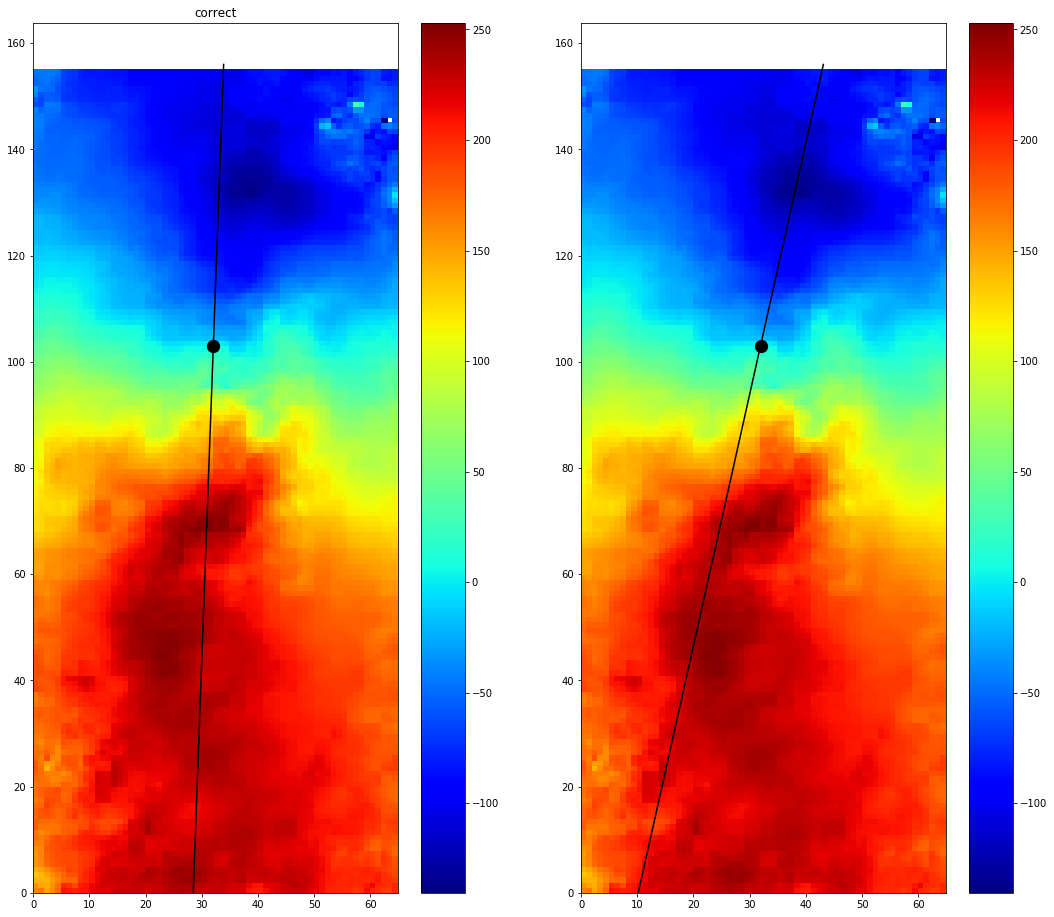

In [7]:
X,Y = np.meshgrid(np.arange(0.,len(velocity_HI[0]),1), np.arange(0.,len(velocity_HI),1))
plt.figure(figsize=[18,16])
plt.subplot(1,2,1)
quadmesh = plt.pcolormesh(X, Y, velocity_HI, cmap='jet')
plt.colorbar()
plt.scatter(32.0778305 ,103.00132757,[150.], color='black' )
plt.plot([28.48,28.48 + 155. * np.tan(2.*np.pi/180)], [0., 156], color='black')
plt.title('correct')

plt.subplot(1,2,2)
quadmesh = plt.pcolormesh(X, Y, velocity_HI, cmap='jet')
plt.colorbar()
plt.scatter(32.0778305 ,103.00132757,[150.], color='black' )
plt.plot([10.18,10.18 + 155. * np.tan(12.*np.pi/180)], [0., 156], color='black')

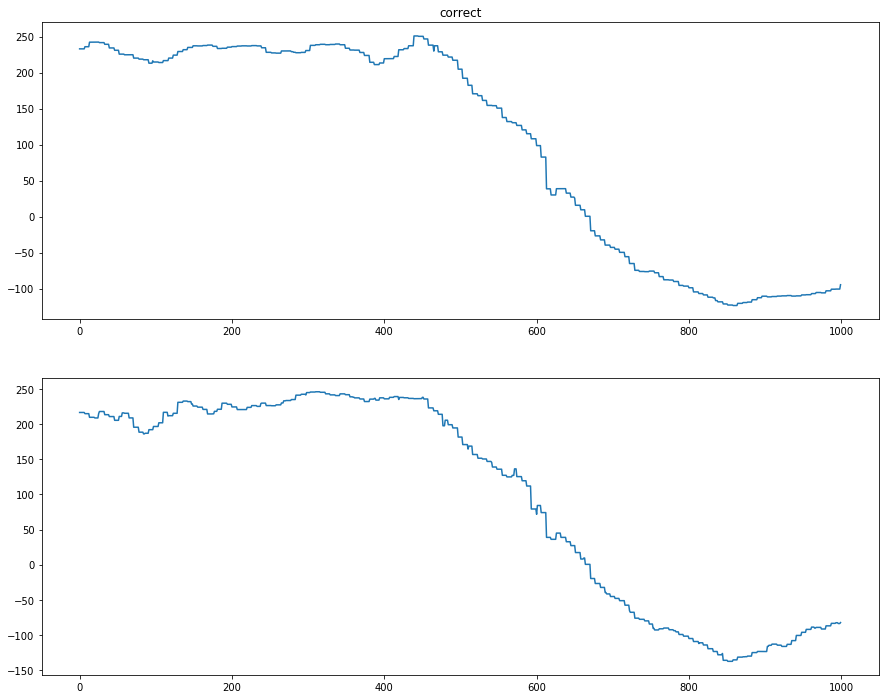

In [8]:
x0, y0 = 10.18, 0. 
x1, y1 = 10.18 + 155. * np.tan(12.*np.pi/180.),155.
num = 1000
x, y = np.linspace(x0, x1, num), np.linspace(y0, y1, num)
zi_cub = velocity_HI[y.astype(np.int), x.astype(np.int)]

x0_corr, y0_corr = 28.48, 0. 
x1_corr, y1_corr = 28.48 + 155. * np.tan(2.*np.pi/180.),155.
num = 1000
x_corr, y_corr = np.linspace(x0_corr, x1_corr, num), np.linspace(y0_corr, y1_corr, num)
zi_cub_corr = velocity_HI[y_corr.astype(np.int), x_corr.astype(np.int)]

fig = plt.figure(figsize = [15, 12])
plt.subplot(2,1,1)
line = plot(zi_cub_corr)
plt.title('correct')
plt.subplot(2,1,2)
line = plot(zi_cub)

In [9]:
#Определим длину нашего среза
r_vel = np.sqrt(155.**2 + (155. * np.tan(12.*np.pi/180))**2)
r_vel_corr = np.sqrt(155.**2 + (155. * np.tan(2.*np.pi/180))**2)
#Переведём в arcsec
r_vel = r_vel * 1.9
r_vel_corr = r_vel_corr * 1.9
#Найдём центр галактики на срезе
c_r_vel = 103.00132757 / math.cos(12.*np.pi/180.)
c_r_vel = c_r_vel * 1.9

c_r_vel_corr = 103.00132757 / math.cos(2.*np.pi/180.)
c_r_vel_corr = c_r_vel_corr * 1.9

In [12]:
vel_HI = sort(np.abs(zi_cub))
vel_HI_corr = sort(np.abs(zi_cub_corr))

r_HI = sort(np.abs(np.linspace(0., r_vel, 1000)-c_r_vel))
r_HI = r_HI * np.pi / (180 *3600) * Distance * 10**3 

r_HI_corr = sort(np.abs(np.linspace(0., r_vel_corr, 1000)-c_r_vel_corr))
r_HI_corr = r_HI_corr * np.pi / (180 *3600) * Distance * 10**3 

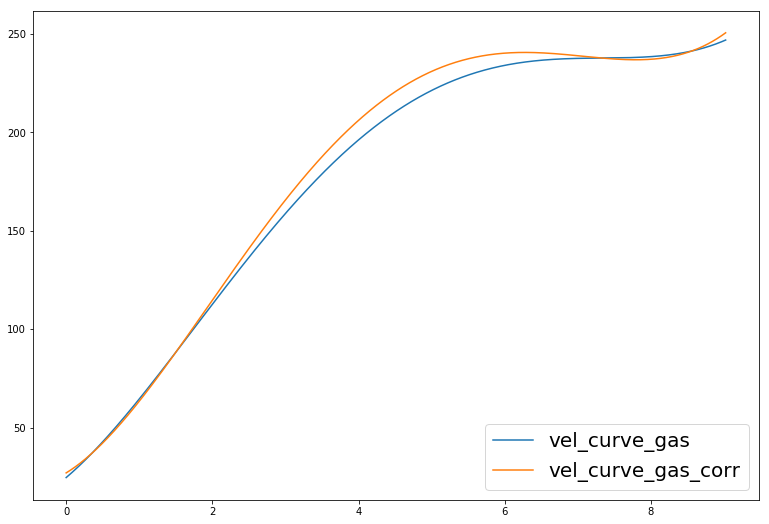

In [23]:
points = np.linspace(min(r_HI), max(r_HI), 1000)
velocity_approx = poly1d(polyfit(r_HI, vel_HI, deg=4))

points_corr = np.linspace(min(r_HI_corr), max(r_HI_corr), 1000)
velocity_approx_corr = poly1d(polyfit(r_HI_corr, vel_HI_corr, deg=4))

fig, ax = plt.subplots(figsize=[13,9])
line1 = ax.plot(points, velocity_approx(points), label='vel_curve_gas')
line2 = ax.plot(points, velocity_approx_corr(points_corr), label='vel_curve_gas_corr')
plt.legend(loc='lower right',fontsize=20)

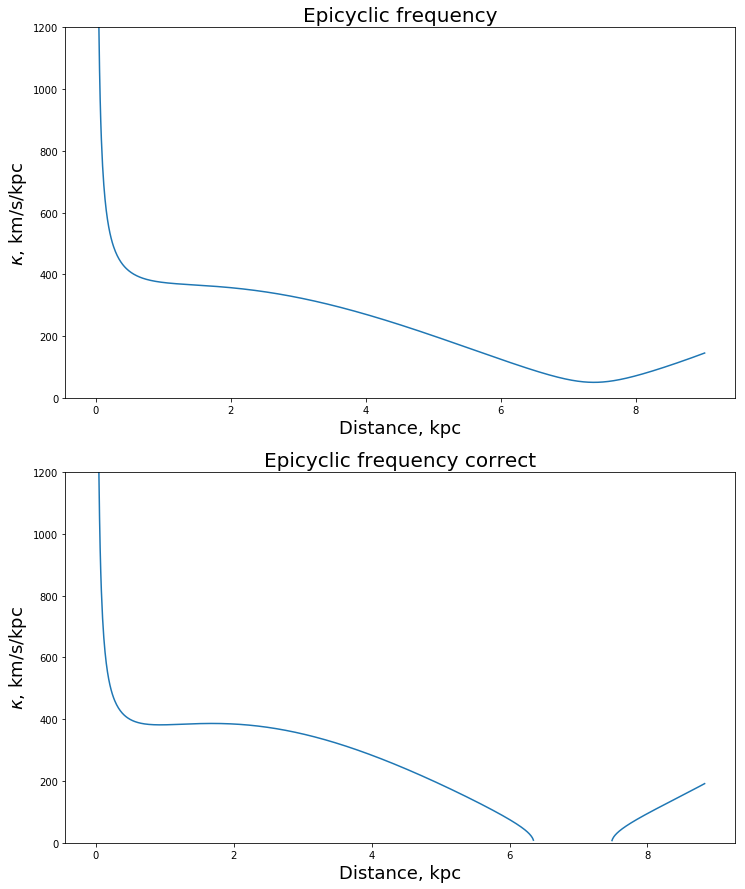

In [27]:
dR =(Distance*1000*2*np.pi)/(360*60*60.)
kappa = [functions.epic_freq(velocity_approx, r, dR) for r in points]
kappa_corr = [functions.epic_freq(velocity_approx_corr, r, dR) for r in points_corr]

fig = plt.figure(figsize = [12,15])
plt.subplot(2,1,1)
plt.plot(points, kappa) 
plt.title('Epicyclic frequency',fontsize = 20)
plt.ylabel('$\kappa$, km/s/kpc', fontsize = 18)
plt.xlabel('Distance, kpc', fontsize = 18)
plt.ylim(0, 1200.)
plt.show

plt.subplot(2,1,2)
plt.plot(points_corr, kappa_corr) 
plt.title('Epicyclic frequency correct',fontsize = 20)
plt.ylabel('$\kappa$, km/s/kpc', fontsize = 18)
plt.xlabel('Distance, kpc', fontsize = 18)
plt.ylim(0, 1200.)
plt.show()

Соответственно у меня и в при подсчёте параметра Тумре получаюся не очень хорошие карты, причём это проблема не исчезает, если я меняю степень интерполяции.

# 1. Параметр Тумре

In [28]:
velocity_approx = poly1d(polyfit(r_HI, vel_HI, deg=4))

In [29]:
dR =(Distance*1000*2*np.pi)/(360*60*60.)
G = 4.32
Qeff_max = np.zeros(dist_kpc.shape)
Qeff_min = np.zeros(dist_kpc.shape)
bark = np.zeros(dist_kpc.shape)
bark_max = np.zeros(dist_kpc.shape)
Qg = np.zeros(dist_kpc.shape)
Qs_min = np.zeros(dist_kpc.shape)
Qs_max = np.zeros(dist_kpc.shape)
Sigma_g = np.zeros(dist_kpc.shape)

step = 0
errors = 0
for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        step+=1
        if step % 1000 == 0:
            print(step)
        c = sigma_HI[i][j]/1000.
        Sigma_g[i][j] = 1.36*(Sigma_HI[i][j] + Sigma_H2[i][j])
        kappa = functions.epic_freq(velocity_approx, dist_kpc[i][j], dR)
        Sigma_s_ = Sigma_s[i][j]
        s_R_max = sig_R_max[i][j]
        s_R_min = sig_R_min[i][j]
        Qg[i][j] = kappa * c / (math.pi * G * Sigma_g[i][j])
        Qs_max[i][j] = kappa * s_R_max / (3.36 * G * Sigma_s_)
        Qs_min[i][j] = kappa * s_R_min / (3.36 * G * Sigma_s_)
        
       
        try:
            root_for_max, qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_min[i][j], Qg=Qg[i][j], s=c/s_R_min)
        except ValueError:
            errors+=1
            qeff = 0.01
            root_for_max = -1.
        Qeff_min[i][j] = 1./qeff
        bark[i][j] = root_for_max
        
        try:
            root_for_max, qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_max[i][j], Qg=Qg[i][j], s=c/s_R_min)
        except ValueError:
            errors+=1
            qeff = 0.01
            root_for_max = -1.
        Qeff_max[i][j] = 1./qeff
        bark_max[i][j] = root_for_max
        
print('Errors:{}'.format(errors))

functions.ipynb:8: RuntimeWarning: invalid value encountered in double_scalars
  ]


1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
Errors:4704


Text(0.5, 1.0, '$Q_{gas}$')

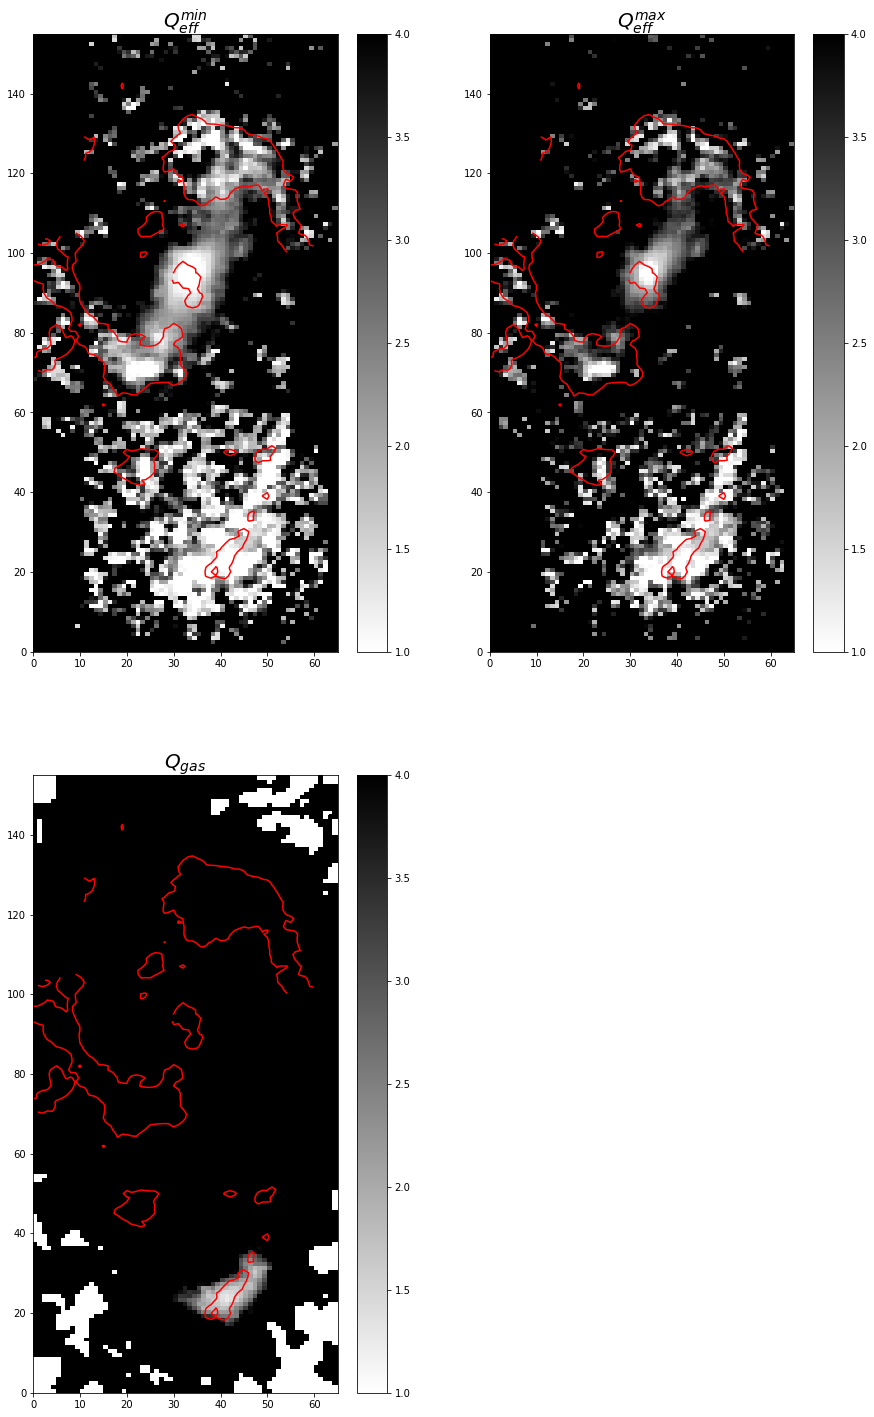

In [34]:
Sigma_SFR = np.load('./data/Sigma_SFR.npy')
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
plt.figure(figsize=[15, 25])
plt.subplot(2,2,1)
CS = plt.contour(X, Y, Sigma_SFR, levels=[0.045,], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_min, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
plt.colorbar()
plt.title(r'$Q_{eff}^{min}$', fontsize=20)

plt.subplot(2,2,2)
CS = plt.contour(X, Y, Sigma_SFR, levels=[0.045,], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_max, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{max}$', fontsize=20)

plt.subplot(2,2,3)
CS = plt.contour(X, Y, Sigma_SFR, levels=[0.045,], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qg, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{gas}$', fontsize=20)

Ошибки дисперсии скоростей звезд. Относительная ошибка.

In [37]:
relative_error_min = np.zeros(sigma_s_err.shape)
relative_error_max = np.zeros(sigma_s_err.shape)

relative_error_max = sig_R_max_err / sig_R_max
relative_error_min = sig_R_min_err / sig_R_min

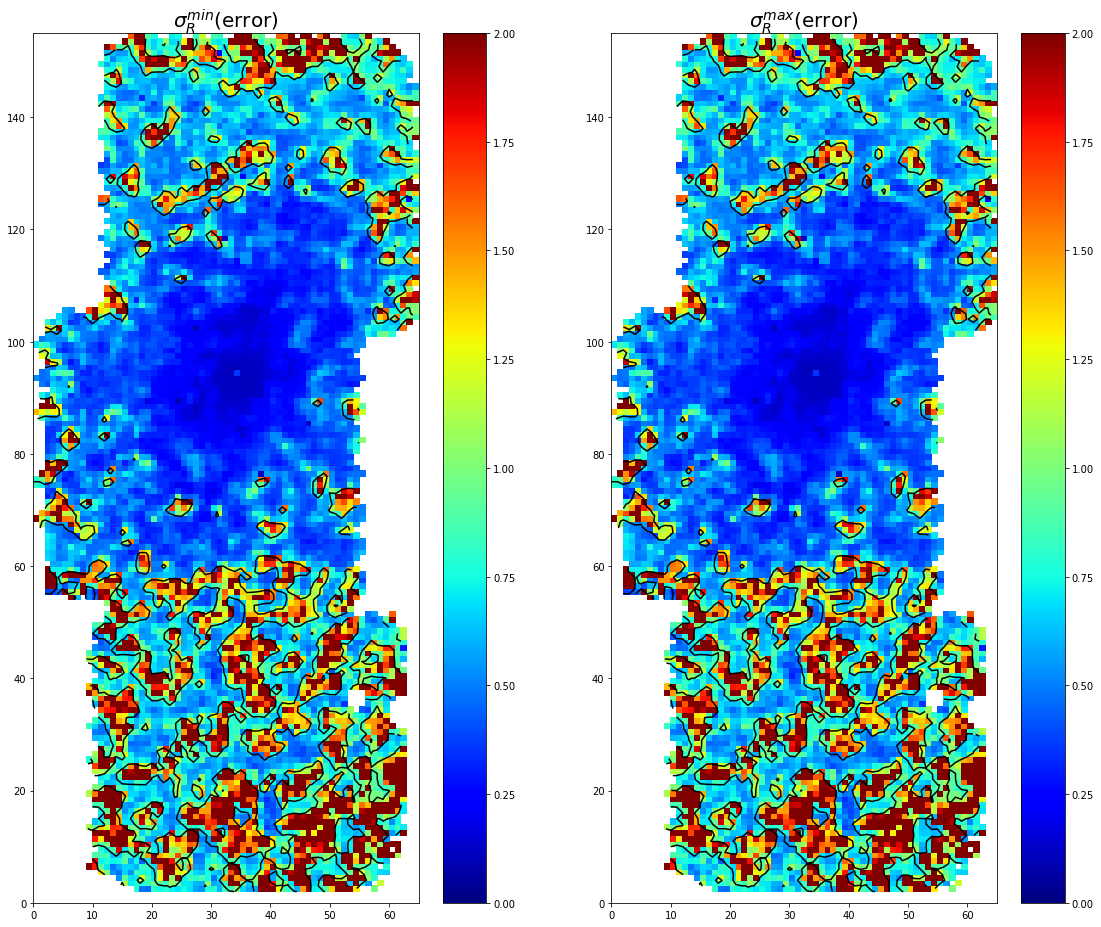

In [38]:
plt.figure(figsize=[19, 16])
plt.subplot(1,2,1)
CS = plt.contour(X, Y, relative_error_min, levels=[1,], aspect='auto', alpha=1, colors='black')
quadmesh = plt.pcolormesh(X, Y, relative_error_min, cmap=cm.jet)
quadmesh.set_clim(vmin=0.0, vmax=2.)
plt.colorbar()
plt.title(r'$\sigma_R^{min}$(error)', fontsize=20)

plt.subplot(1,2,2)
CS = plt.contour(X, Y, relative_error_max, levels=[1,], aspect='auto', alpha=1, colors='black')
quadmesh = plt.pcolormesh(X, Y, relative_error_max, cmap=cm.jet)
quadmesh.set_clim(vmin=0.0, vmax=2.)
plt.colorbar()
plt.title(r'$\sigma_R^{max}$(error)',fontsize=20)
plt.show()

Text(0.5, 1.0, '$Q_{eff}^{max}$')

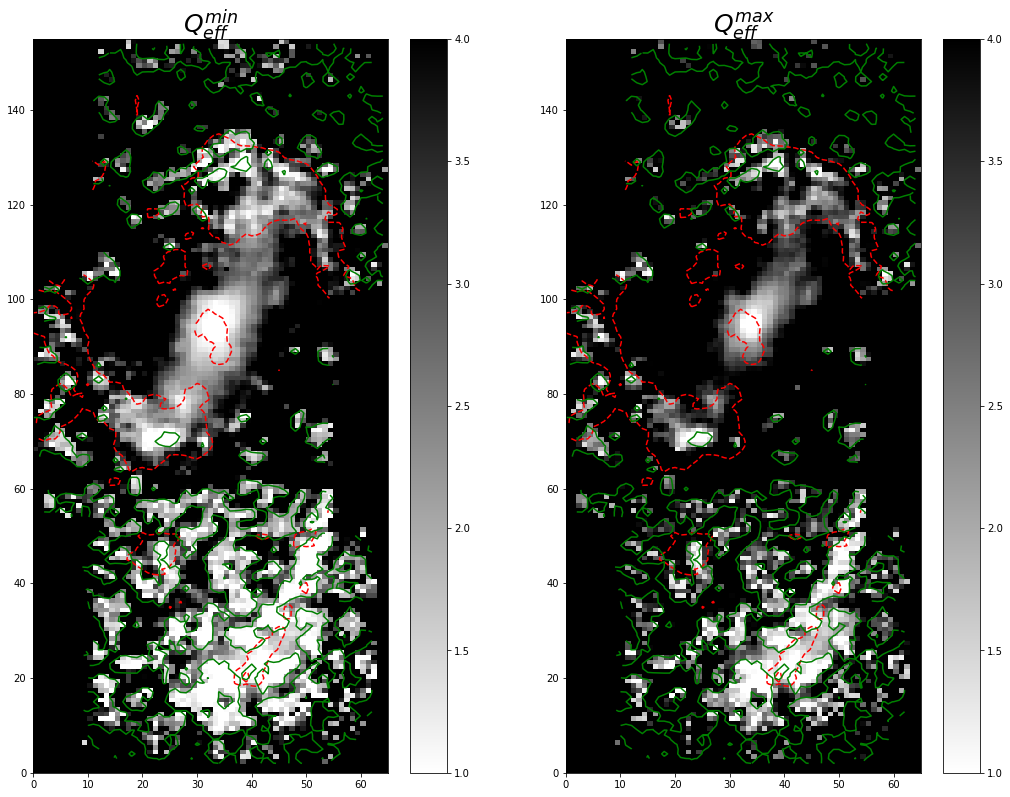

In [42]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
plt.figure(figsize=[17.5, 13.5])
plt.subplot(1,2,1)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.2,-12], aspect='auto', alpha=1, colors='red')
CS = plt.contour(X, Y, relative_error_min, levels=[1,], aspect='auto', alpha=1, colors='green')
quadmesh = plt.pcolormesh(X, Y, Qeff_min, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
plt.colorbar()
plt.title(r'$Q_{eff}^{min}$', fontsize=25)

plt.subplot(1,2,2)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.2,-12], aspect='auto', alpha=1, colors='red')
CS = plt.contour(X, Y, relative_error_max, levels=[1,], aspect='auto', alpha=1, colors='green')
quadmesh = plt.pcolormesh(X, Y, Qeff_max, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{max}$', fontsize=25)

## Азимутальное усреднение. Сравнение с Leroy.

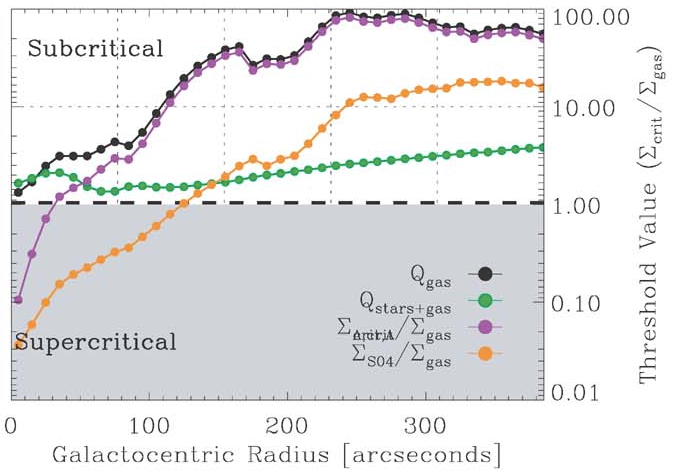

In [45]:
Image('./images/instability.png')

In [65]:
def azimuthal_average(Q, step=None, vmax=None, maxval=None, vmin=0.5):
    az_av = []
    az_dev = []
    anulli = []
    for dbin in np.arange(vmin,vmax,step):
        
        for i, row in enumerate(dist_kpc):
            for j, col in enumerate(dist_kpc[0]):
                
                if (0 <= Q[i][j] < maxval):
                    if (dist_kpc[i][j] >= dbin) & (dist_kpc[i][j] <= dbin + step):
                        anulli.append(Q[i][j])
                 
        
        az_av.append(sum(anulli)/len(anulli))
        az_dev.append(np.std(anulli))
    return az_av, az_dev

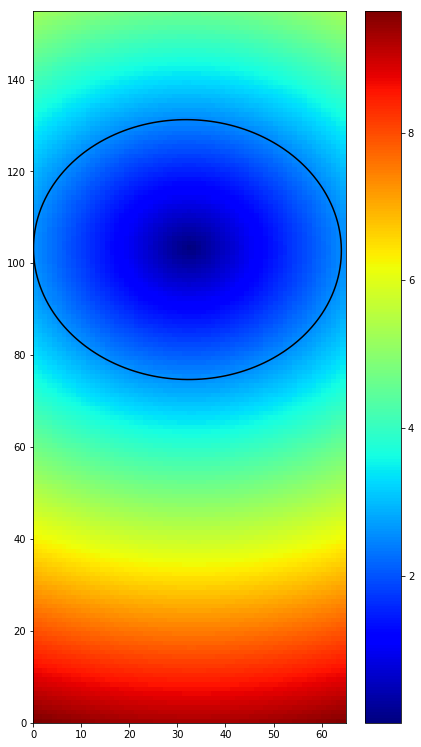

In [66]:
plt.figure(figsize=[7.,13.1])
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
CS = plt.contour(X, Y, dist_kpc, levels=[0.,2.55], aspect='auto', alpha=1, colors='black')
quadmesh = plt.pcolormesh(X, Y, dist_kpc, cmap='jet')
plt.colorbar()
#2.55 -масимальный радиус усреднения на кругу

In [67]:
Sigma_H2_az = azimuthal_average(Sigma_H2, step=0.25, vmax=10., maxval = 140.)[0]
sigma_HI_az = azimuthal_average(sigma_HI/1000., step=0.25, vmax=10., maxval = 100.)[0]
Sigma_HI_az = azimuthal_average(Sigma_HI, step=0.25, vmax=10., maxval = 7.)[0]
Sigma_s_az = azimuthal_average(Sigma_s, step=0.25, vmax=10., maxval = 4000.)[0]
sig_R_max_az = azimuthal_average(sig_R_max, step=0.25, vmax=10., maxval = 300.)[0]
sig_R_min_az = azimuthal_average(sig_R_min, step=0.25, vmax=10., maxval = 300.)[0]
dist_az = np.array(np.arange(0.5,10.,0.25))

IndexError: invalid index to scalar variable.

In [ ]:
dR =(Distance*1000*2*np.pi)/(360*60*60.)
G = 4.32

Qeff_max_az = np.zeros(dist_az.shape)
Qeff_min_az = np.zeros(dist_az.shape)
Qg_az = np.zeros(dist_az.shape)
Qs_max_az = np.zeros(dist_az.shape)
Qs_min_az = np.zeros(dist_az.shape)
error = 0
step = 0
for i, ddd in enumerate(np.arange(0.5, 11., 0.5)):
    step+=1
    c = sigma_HI_az[i]
    Sigma_g = 1.36*(Sigma_HI_az[i]+ Sigma_H2_az[i])
    kappa = functions.epic_freq(velocity_approx, ddd, dR)
    Sigma_s = Sigma_s_az[i]
    s_R_max = sig_R_max_az[i]
    s_R_min = sig_R_min_az[i]
    Qg_az[i] = kappa * c / (math.pi * G * Sigma_g)
    Qs_max_az[i] = kappa * s_R_max / (3.36 * G * Sigma_s)
    Qs_min_az[i] = kappa * s_R_min / (3.36 * G * Sigma_s)
        
    try:   
        root, qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_min_az[i], Qg=Qg_az[i], s=c/s_R_min)
    except:
        error+=1
        qeff = 0.01
    Qeff_min_az[i] = 1./qeff
    
    try: 
        root,qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_max_az[i], Qg=Qg_az[i], s=c/s_R_min)
    except:
        error+=1
        qeff = 0.01
    Qeff_max_az[i] = 1./qeff
print(error)  

In [ ]:
plt.figure(figsize=[14,10])
plt.plot(np.array(np.arange(0.5,11.,0.5)),Qeff_min_az, '--', label='Qeff_min', color='red')


plt.plot(np.array(np.arange(0.5,11.,0.5)),Qeff_max_az, '--', label='Qeff_max', color='blue')

plt.plot(np.array(np.arange(0.5,11.,0.5)),Qg_az, '--', label='Qg', color='green')
 


plt.grid()
plt.legend()
plt.axvline(x=11., alpha=0.3)
plt.ylim(0, 40.)

to do: нужно нормально оцифровать данные Леруа

# 2. Shear

$$ \Sigma_{gas} > \frac{2.5 A \sigma_{g}}{\pi G}$$

$A = 0.5 ( \dfrac{v(r_{gal})}{r_{gal}} - \dfrac{dv(r_{gal})}{dr_{gal}} ) $


In [101]:
G = 4.32
dR =(Distance*1000*2*np.pi)/(360*60*60.)
Sigma_crit = np.zeros(dist_kpc.shape)
for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
 
        A = 0.5 * (velocity_approx(dist_kpc[i][j]) / dist_kpc[i][j] - velocity_approx.deriv()(dist_kpc[i][j]))  
        sigma_g = sigma_HI[i][j]/1000.
  
        Sigma_crit[i][j] = 3.3 * A * sigma_g / np.pi / G

In [102]:
Inst_field = np.zeros(dist_kpc.shape)

for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        Sigma_gas = 1.36*(Sigma_HI[i][j] + Sigma_H2[i][j])
        if(Sigma_gas > Sigma_crit[i][j]):
            Inst_field[i][j] = 1
        else: 
            Inst_field[i][j] = 0

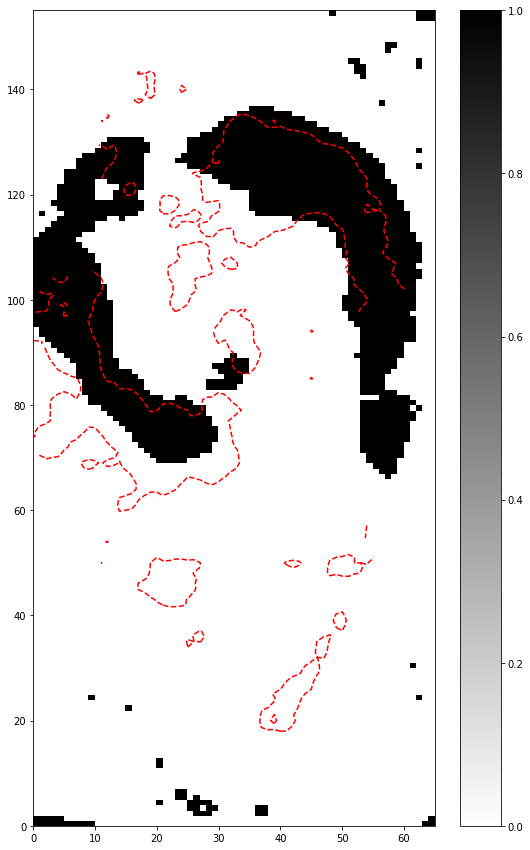

In [103]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
fig = plt.figure(figsize=[9,15])
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.3,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Inst_field, cmap='gist_yarg')
plt.colorbar()

In [104]:
shear_method = np.zeros(dist_kpc.shape)

for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        Sigma_gas = 1.36*(Sigma_HI[i][j] + Sigma_H2[i][j])
        shear_method[i][j] = Sigma_crit[i][j] / Sigma_gas 

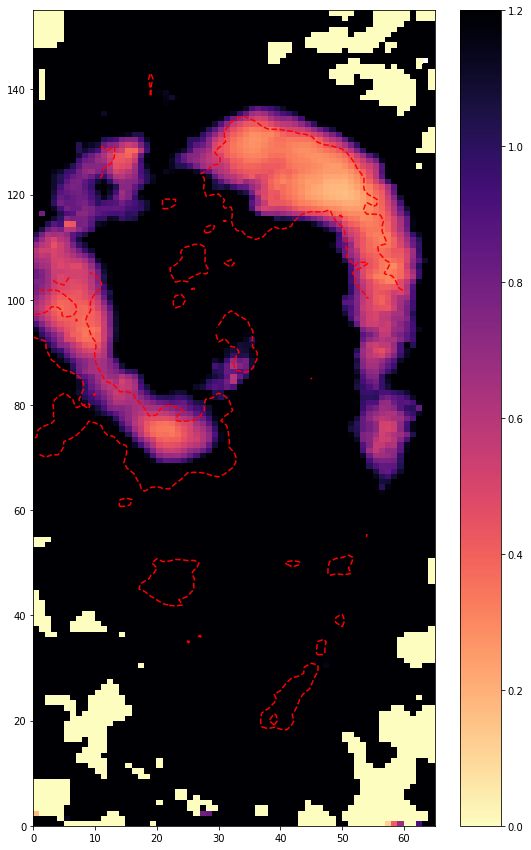

In [105]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
fig = plt.figure(figsize=[9,15])
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.2,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, shear_method, cmap='magma_r')
quadmesh.set_clim(vmin = 0., vmax = 1.2)
plt.colorbar()

Построим график зависимости A(R)  

In [106]:
velocity_approx = poly1d(polyfit(r_HI, vel_HI, deg=4))
A = []
R = np.array(np.linspace(0.1,10.,100))

for dist in R:
    A.append(0.5 * (velocity_approx(dist) / dist - velocity_approx.deriv()(dist)))

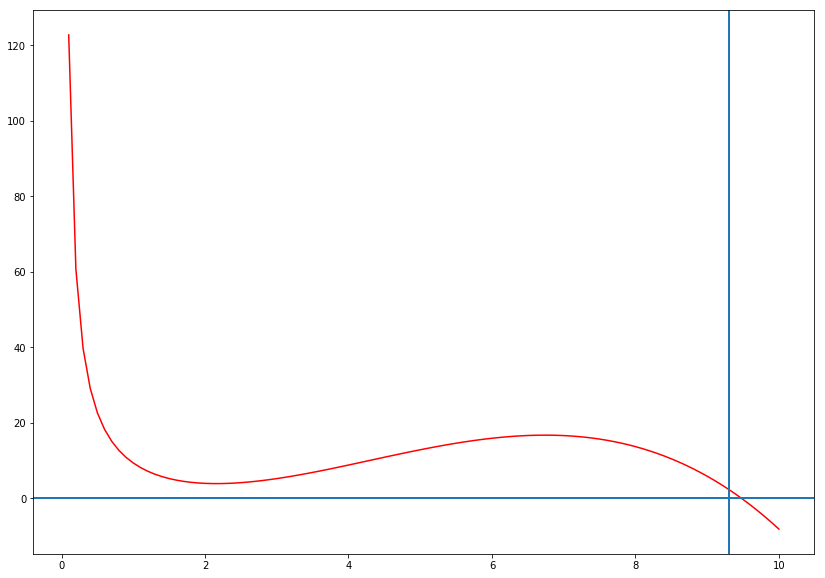

In [107]:
plt.figure(figsize=[14,10])
plt.plot(R,A, color='red')
plt.axhline(y = 0., lw = 2)
plt.axvline(x = 9.3, lw = 2)

# 3. Cold phase

$$ \Sigma_{SO_4} = \dfrac{6.1}{M_{\odot} pc^{-2}} f_g^{0.3}\left(\dfrac{Z}{0.1 Z_{\odot}}\right)^{-0.3} \left(\dfrac{I}{10^6 cm^{-2}s^{-1}}\right)^{0.23} $$

$$f_g = \dfrac{\Sigma_{gas}}{\Sigma_{gas}+\Sigma_{star}}$$

$$I = 10^6 cm^{-2}s^{-1}\left(\dfrac{\Sigma_{SFR}}{5\cdot 10^4 M_{\odot} yr^{-1} pc^{-2}}\right) $$

Если $\Sigma_{gas} > \Sigma_{SO_4}$, то облать гравитационно нестабильна

In [110]:
cold_phase = np.zeros(dist_kpc.shape)
I = np.zeros(dist_kpc.shape)
I = Sigma_SFR * 5. * 10**10
Z_sun = 0.012
for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        Sigma_gas = 1.36 * (Sigma_HI[i][j]+Sigma_H2[i][j])
        f = Sigma_gas / (Sigma_gas + Sigma_s[i][j])
        Sigma_SO = 6.1 * np.power(f, 0.3,dtype = np.float)  * np.power(I[i][j], 0.23,dtype = np.float)
        cold_phase[i][j] = Sigma_SO / Sigma_gas  * np.power(Z[i][j]/Z_sun/0.1, -0.3,dtype = np.float) 

/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in power
  if __name__ == '__main__':
/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in power
  # Remove the CWD from sys.path while we load stuff.


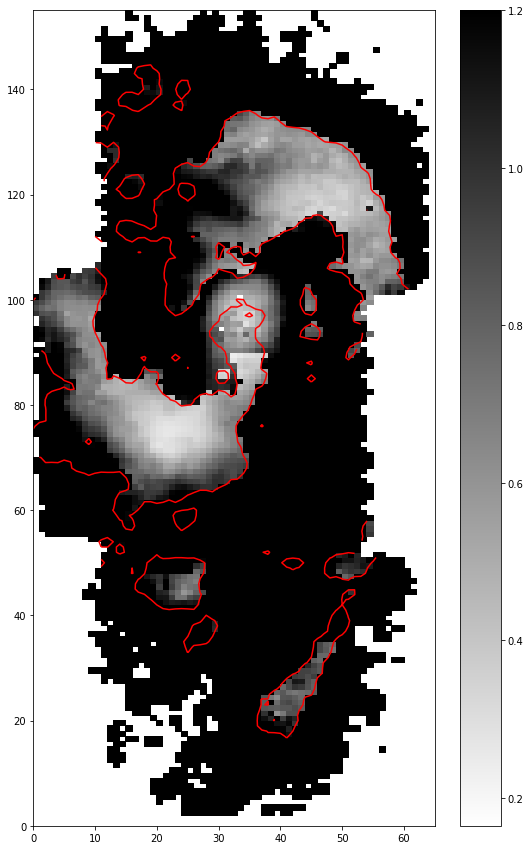

In [111]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
fig = plt.figure(figsize=[9,15])
CS = plt.contour(X, Y, Sigma_SFR, levels=[0.021,], aspect='auto', alpha=1, colors='red')
#CS = plt.contour(X, Y, Z, levels=[0,1], aspect='auto', alpha=1, colors='green')
quadmesh = plt.pcolormesh(X, Y, cold_phase, cmap='gist_yarg')

quadmesh.set_clim( vmax = 1.2)
plt.colorbar()

In [112]:
Inst_field = np.zeros(dist_kpc.shape)

for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        if(0. < cold_phase[i][j] <= 1.):
            Inst_field[i][j] = 1
        if(cold_phase[i][j] > 1.): 
            Inst_field[i][j] = 0
        if(Z[i][j] == NAN):
            Inst_field[i][j] = NAN

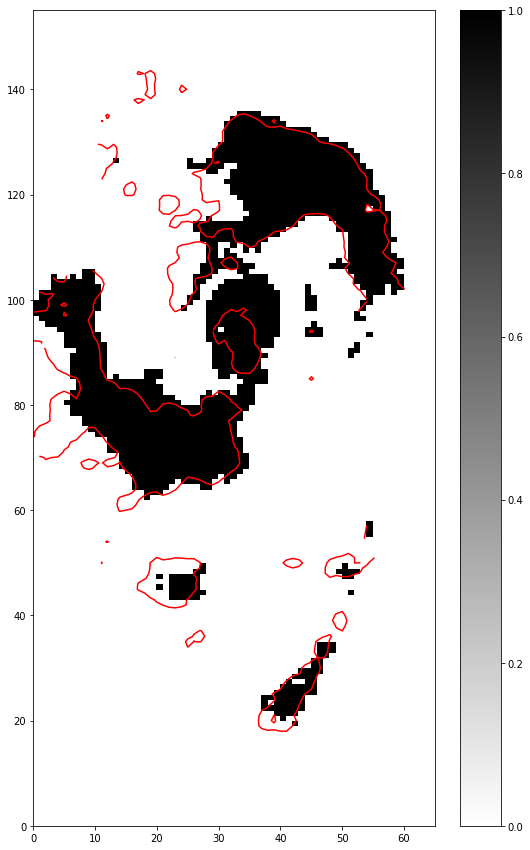

In [113]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
fig = plt.figure(figsize=[9,15])
CS = plt.contour(X, Y, Sigma_SFR, levels=[0.032,], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Inst_field, cmap='gist_yarg')
plt.colorbar()

## Модель Romeo

In [115]:
G = 4.32
Qeff_max_rom = np.zeros(dist_kpc.shape)
Qeff_min_rom = np.zeros(dist_kpc.shape)
rom_comp_min = np.zeros(dist_kpc.shape)
rom_comp_max = np.zeros(dist_kpc.shape)
Sigma_g = np.zeros(dist_kpc.shape)

step = 0
errors = 0
for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        step+=1
        if step % 1000 == 0:
            print (step)
        c = sigma_HI[i][j]/1000.
        Sigma_g[i][j] = 1.36*(Sigma_HI[i][j] + Sigma_H2[i][j])
        kappa = functions.epic_freq(velocity_approx, dist_kpc[i][j], dR)
        s_R_max = sig_R_max[i][j]
        s_R_min = sig_R_min[i][j]
        try:
            rom_max, comp = functions.romeo_Qinv(r=None, epicycl=kappa, sound_vel_CO=c, sound_vel_HI=c, 
                            sigma_R=s_R_max, 
                            star_density=Sigma_s[i][j], HI_density=Sigma_HI[i][j], CO_density=Sigma_H2[i][j], 
                            alpha=0.3, thin=True, verbose=False)
        except ValueError:
            errors+=1
            rom_max = 0.01
            comp = 'error'
        Qeff_max_rom[i][j] = 1./rom_max
        if comp == 'star':
            marker = 1
        elif comp == 'HI':
            marker = 2
        elif comp == 'H2':
            marker = 3
        elif comp == 'error':
            marker = 0
        rom_comp_max[i][j] = marker
        
        try:
            rom_min, comp = functions.romeo_Qinv(r=None, epicycl=kappa, sound_vel_CO=c, sound_vel_HI=c, 
                            sigma_R=s_R_min, 
                            star_density=Sigma_s[i][j], HI_density=Sigma_HI[i][j], CO_density=Sigma_H2[i][j], 
                            alpha=0.7, thin=True, verbose=False)
        except ValueError:
            errors+=1
            rom_min = 0.01
            comp = 'error'
        Qeff_min_rom[i][j] = 1./rom_min
        if comp == 'star':
            marker = 1
        elif comp == 'HI':
            marker = 2
        elif comp == 'H2':
            marker = 3
        elif comp == 'error':
            marker = 0
        rom_comp_min[i][j] = marker

        
print ('Errors:{}'.format(errors))

functions.ipynb:39: RuntimeWarning: invalid value encountered in double_scalars
  "    X,Y=np.meshgrid(np.arange(0,width,1),np.arange(0,height,1))\n",


1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
Errors:0


Text(0.5, 1.0, 'rom_comp_min')

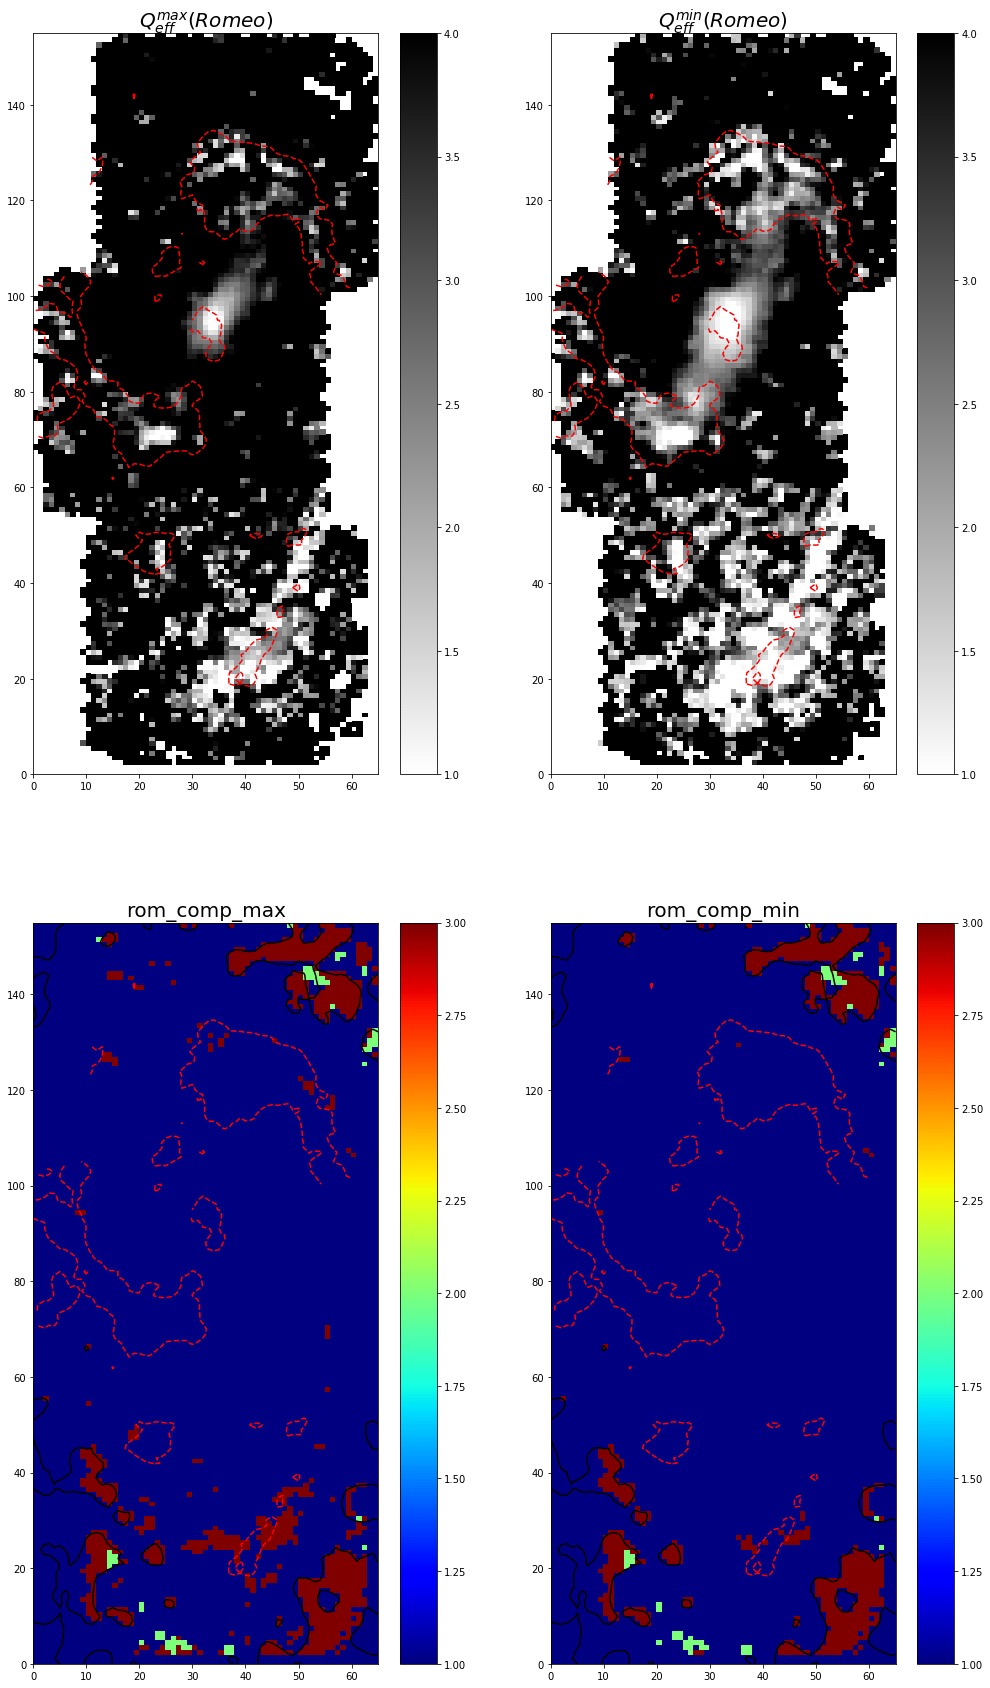

In [116]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
plt.figure(figsize=[17, 30])
plt.subplot(2,2,1)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.15,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_max_rom, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{max}(Romeo)$', fontsize=20)

plt.subplot(2,2,2)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.15,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y,Qeff_min_rom, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{min}(Romeo)$', fontsize=20)

plt.subplot(2,2,3)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.15,-12], aspect='auto', alpha=1, colors='red')
CS = plt.contour(X, Y, Sigma_H2, levels=[-10,0], aspect='auto', alpha=1, colors='black')
#CS = plt.contour(X, Y, Sigma_HI, levels=[-10,0], aspect='auto', alpha=1, colors='black')
quadmesh = plt.pcolormesh(X, Y, rom_comp_max, cmap='jet')
#quadmesh.set_clim(vmin=1., vmax=4.)
plt.colorbar()
plt.title('rom_comp_max', fontsize=20)

plt.subplot(2,2,4)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.15,-12], aspect='auto', alpha=1, colors='red')
CS = plt.contour(X, Y, Sigma_H2, levels=[-10,0], aspect='auto', alpha=1, colors='black')
#CS = plt.contour(X, Y, Sigma_HI, levels=[-10,0], aspect='auto', alpha=1, colors='black')
quadmesh = plt.pcolormesh(X, Y,rom_comp_min, cmap='jet')
#quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'rom_comp_min', fontsize=20)
